# Regression 2: Generalisation and Evaluation
## Iain Styles
## Machine Learning and Intelligent Data Analysis 2021/22

# Recreate the dataset

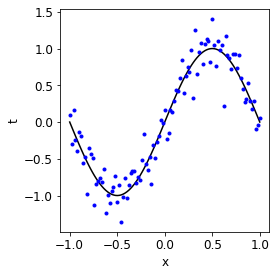

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [4, 4] # inches
mpl.rcParams['font.size'] = 12
# We set the random seed manually so that the results can be reproduced
np.random.seed(1234)
# define the data generating function
h = lambda x: np.sin(np.pi*x)
xmin = -1
xmax = 1
# Define a single independent variable
N = 101
x = np.linspace(xmin, xmax, num=N)
# Define the data with added noise
t = h(x) + 0.2*(np.random.randn(N))
# Add random Gaussian noise with unit variance
plt.figure()
plt.plot(x,h(x),'k-',x,t,'b.')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()

# Training-Validation-Test Splits

## Figure 6
The Train-Validation-Test split. A sampling of the data is divided into a training set (11 blue points), validation set (ten yellow points), and test set(ten red points). The training set was used to learn the model parameters, the validation set was used to select the optimal model. The test set will be used to evaluate how well the selected model performs on unseen data. The loss is computed on the training (blue) and validation (yellow) sets for each of the models.

0 &  0.02
1 &  0.02 &  0.65
2 & -0.04 &  0.65 &  0.15
3 & -0.04 &  2.51 &  0.15 & -2.60
4 & -0.05 &  2.51 &  0.21 & -2.60 & -0.06
5 & -0.05 &  3.00 &  0.21 & -4.66 & -0.06 &  1.63
6 &  0.03 &  3.00 & -1.26 & -4.66 &  4.00 &  1.63 & -2.69
7 &  0.03 &  2.40 & -1.26 &  0.64 &  4.00 & -9.52 & -2.69 &  6.47
8 &  0.10 &  2.40 & -3.94 &  0.64 & 19.22 & -9.52 & -29.24 &  6.47 & 13.94
9 &  0.10 &  2.41 & -3.94 &  0.47 & 19.22 & -8.80 & -29.24 &  5.37 & 13.94 &  0.54
10 &  0.17 &  2.41 & -9.18 &  0.47 & 77.45 & -8.80 & -241.80 &  5.37 & 312.46 &  0.54 & -139.02


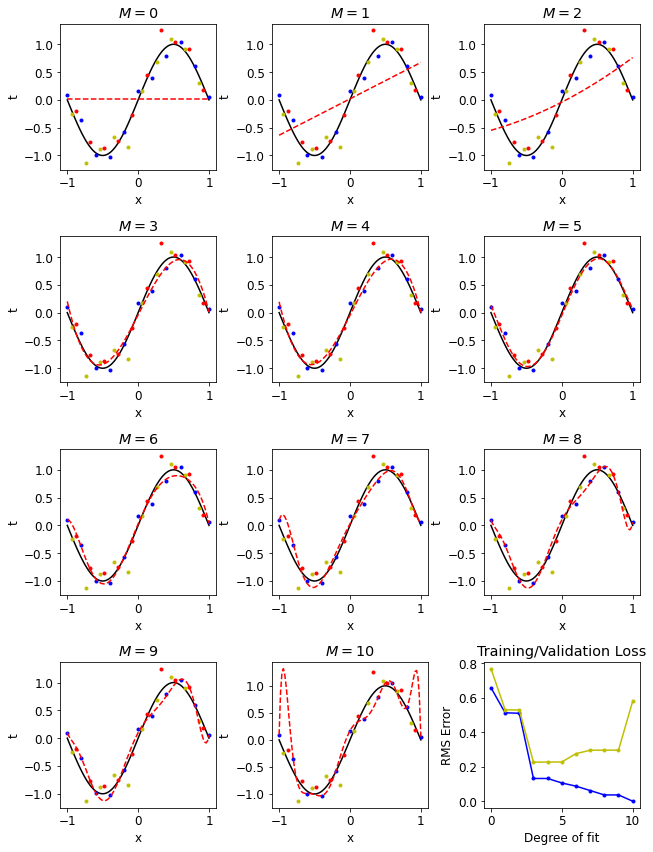

In [4]:
# The training set
import matplotlib.pyplot as plt
xtrain = x[0::10]
ttrain = t[0::10]
# The validation set
xvalid = x[3::10]
tvalid = t[3::10]
# The test set
xtest = x[6::10]
ttest = t[6::10]

# Maximum degree of fit
M = 11
# Empty list to record the RMS errors
rmstrain = []
rmsvalid = []
# Empty list to record the weights for each regression run
weights = []
plt.figure(figsize=[9,12])
# For each degree of polynomial fit
for i in range(0,M):
    # Create the Matrix of basis functions for the sampled data
    PhiTrain = np.array([pow(xtrain,j) for j in range(0,i+1)]).transpose()
    PhiValid = np.array([pow(xvalid,j) for j in range(0,i+1)]).transpose()
    PhiTest = np.array([pow(xtest,j) for j in range(0,i+1)]).transpose()
    # Create a high-resolution basis matrix so that we can plot the fitted polynomial smoothly
    hiPhi = np.array([pow(x,j) for j in range(0,i+1)]).transpose()
    # Solve the normal equations using a standard solver
    w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrain))
    # record the weights
    weights.append(w)
    # Compute the estimated values of the data points so we can compute the error
    ytrain = np.matmul(PhiTrain,w)
    yvalid = np.matmul(PhiValid,w)
    # compute the RMS error
    rmstrain.append(np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size)))
    rmsvalid.append(np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size)))
    # plot the data and the estimates of the model for the low-res and high-res samplings
    plt.subplot(4,3,i+1)
    plt.plot(x,h(x),'k-')
    plt.plot(xtrain,ttrain,'b.')
    plt.plot(xvalid,tvalid,'y.')
    plt.plot(xtest,ttest,'r.')
    plt.plot(x,np.matmul(hiPhi,w),'r--')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.title(fr'$M={i}$')
# Plot the error curve
plt.subplot(4,3,M+1)
plt.plot(rmstrain,'b.-')
plt.plot(rmsvalid,'y.-')
plt.xlabel('Degree of fit')
plt.ylabel('RMS Error')
plt.title('Training/Validation Loss')
plt.tight_layout()
plt.savefig('polyfit-sin-11-validation.png')
# Print out the weights
for i,w in enumerate(weights):
    print(str(i) + ' & ' + ' & '.join(['{:5.2f}'.format(i) for i in w]))    

The optimal fit is cubic. Let's compute the RMS error on the test set

In [3]:
# Recompute the basis for the cubic model (set in "range")
polyorder = 3
PhiTrain = np.array([pow(xtrain,j) for j in range(0,polyorder+1)]).transpose()
PhiValid = np.array([pow(xvalid,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrain))
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
yvalid = np.matmul(PhiValid,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrain-ytrain,2)/xtrain.size))
validation_loss = np.sqrt(np.sum(pow(tvalid-yvalid,2)/xvalid.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Validation loss = {validation_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")

Training loss = 0.13
Validation loss = 0.23
Test loss = 0.21


# Cross Validation

Order & Train & Valid \\
0 & 0.677 & 0.786
1 & 0.484 & 0.647
2 & 0.473 & 0.673
3 & 0.159 & 0.249
4 & 0.154 & 0.266
5 & 0.137 & 0.264
6 & 0.126 & 0.512
7 & 0.109 & 0.398


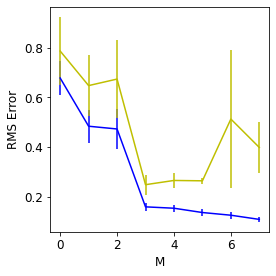

In [4]:
# Construct the dataset
# the combined data for cross-validation 21 pts: 0, 5, 10,..., 95, 100
xtrainval = x[0::5]
ttrainval = t[0::5]
# a test set of 10 pts: 3, 13, 23, ..., 93
xtest = x[3::10]
ttest = t[3::10]

# We now split the dataset into five random folds

# First, combine the x and t data into a single array
trainval = np.concatenate([np.atleast_2d(xtrainval).T,np.atleast_2d(ttrainval).T],axis=1)

# Randomise the order
trainval = np.random.permutation(trainval)

# Split the dataset, remembering that we randomised the order of the data points. We'll split into K=3 folds.
Folds = [ trainval[0:7], trainval[7:14], trainval[14:21] ]

M = [0,1,2,3,4,5,6,7] # max polynomial order set to 7 because the training 
K = 3 # number of folds
rmstrain = [] # error on the training folds
rmsvalid = [] # RMS error on the validation fold
stdtrain = [] # standard deviation over the training sets
stdvalid = [] # standard deviation over the validation sets

for i in M:
    # Record the performance on the folds
    train_loss = []
    validation_loss = []
    for j in range(K):
        # Select the one validation fold
        Valid = Folds[j]
        # Select and combine the K-1 training folds
        Train = np.concatenate(Folds[:j]+Folds[j+1:])
        # Compute the basis matrix for the training and validation folds
        PhiTrain = np.array([pow(Train[:,0],j) for j in range(0,i+1)]).transpose()
        PhiValid = np.array([pow(Valid[:,0],j) for j in range(0,i+1)]).transpose()
        # Train the model
        w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),Train[:,1]))
        # Compute the error on the training set
        train_loss.append(np.sqrt(np.average(pow(Train[:,1]-np.matmul(PhiTrain,w),2))))
        # Compute the error on the validation set
        validation_loss.append(np.sqrt(np.average(pow(Valid[:,1]-np.matmul(PhiValid,w),2))))
    # Record the average over the folds
    rmstrain.append(np.average(train_loss))
    rmsvalid.append(np.average(validation_loss))
    stdtrain.append(np.std(train_loss))
    stdvalid.append(np.std(validation_loss))    
    
plt.figure()
plt.errorbar(M,rmstrain,fmt='b-',yerr=stdtrain,label="Train")
plt.errorbar(M,rmsvalid,fmt='y-',yerr=stdvalid,label="Validation")
plt.xlabel('M')
plt.ylabel('RMS Error')
plt.tight_layout()
plt.savefig('cross-validation-loss.png')

print("Order & Train & Valid \\\\")
for i in M:
    print(f"{i:d} & {rmstrain[i]:.3f} & {rmsvalid[i]:.3f}")

Again, we find that the optimal model is cubic. We retrain the model on the full cross-validation set

Training loss = 0.17
Test loss = 0.22


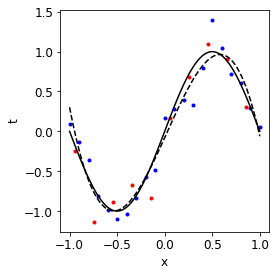

In [5]:
# Recompute the basis for the cubic model
polyorder = 3
PhiTrain = np.array([pow(xtrainval,j) for j in range(0,polyorder+1)]).transpose()
PhiTest = np.array([pow(xtest,j) for j in range(0,polyorder+1)]).transpose()
hiPhi = np.array([pow(x,j) for j in range(0,polyorder+1)]).transpose()
# Solve the normal equations using a standard solver
w = np.linalg.solve(np.matmul(PhiTrain.transpose(),PhiTrain), np.matmul(PhiTrain.transpose(),ttrainval))
# Compute the estimated values of the data points so we can compute the error
ytrain = np.matmul(PhiTrain,w)
ytest = np.matmul(PhiTest,w)
# compute the RMS error
training_loss = np.sqrt(np.sum(pow(ttrainval-ytrain,2)/xtrainval.size))
test_loss = np.sqrt(np.sum(pow(ttest-ytest,2)/xtest.size))
print(f"Training loss = {training_loss:.2f}")
print(f"Test loss = {test_loss:.2f}")
# Plot the data
plt.figure()
plt.plot(xtrainval,ttrainval,'b.')
plt.plot(xtest,ttest,'r.')
plt.plot(x,h(x),'k-')
plt.plot(x,np.matmul(hiPhi,w),'k--')
plt.xlabel('x')
plt.ylabel('t')
plt.tight_layout()
plt.savefig('cross-validation-result.png')